# K Nearest Neighbors Project 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Data

In [4]:
data = pd.read_csv('KNN_Project_Data')

In [5]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

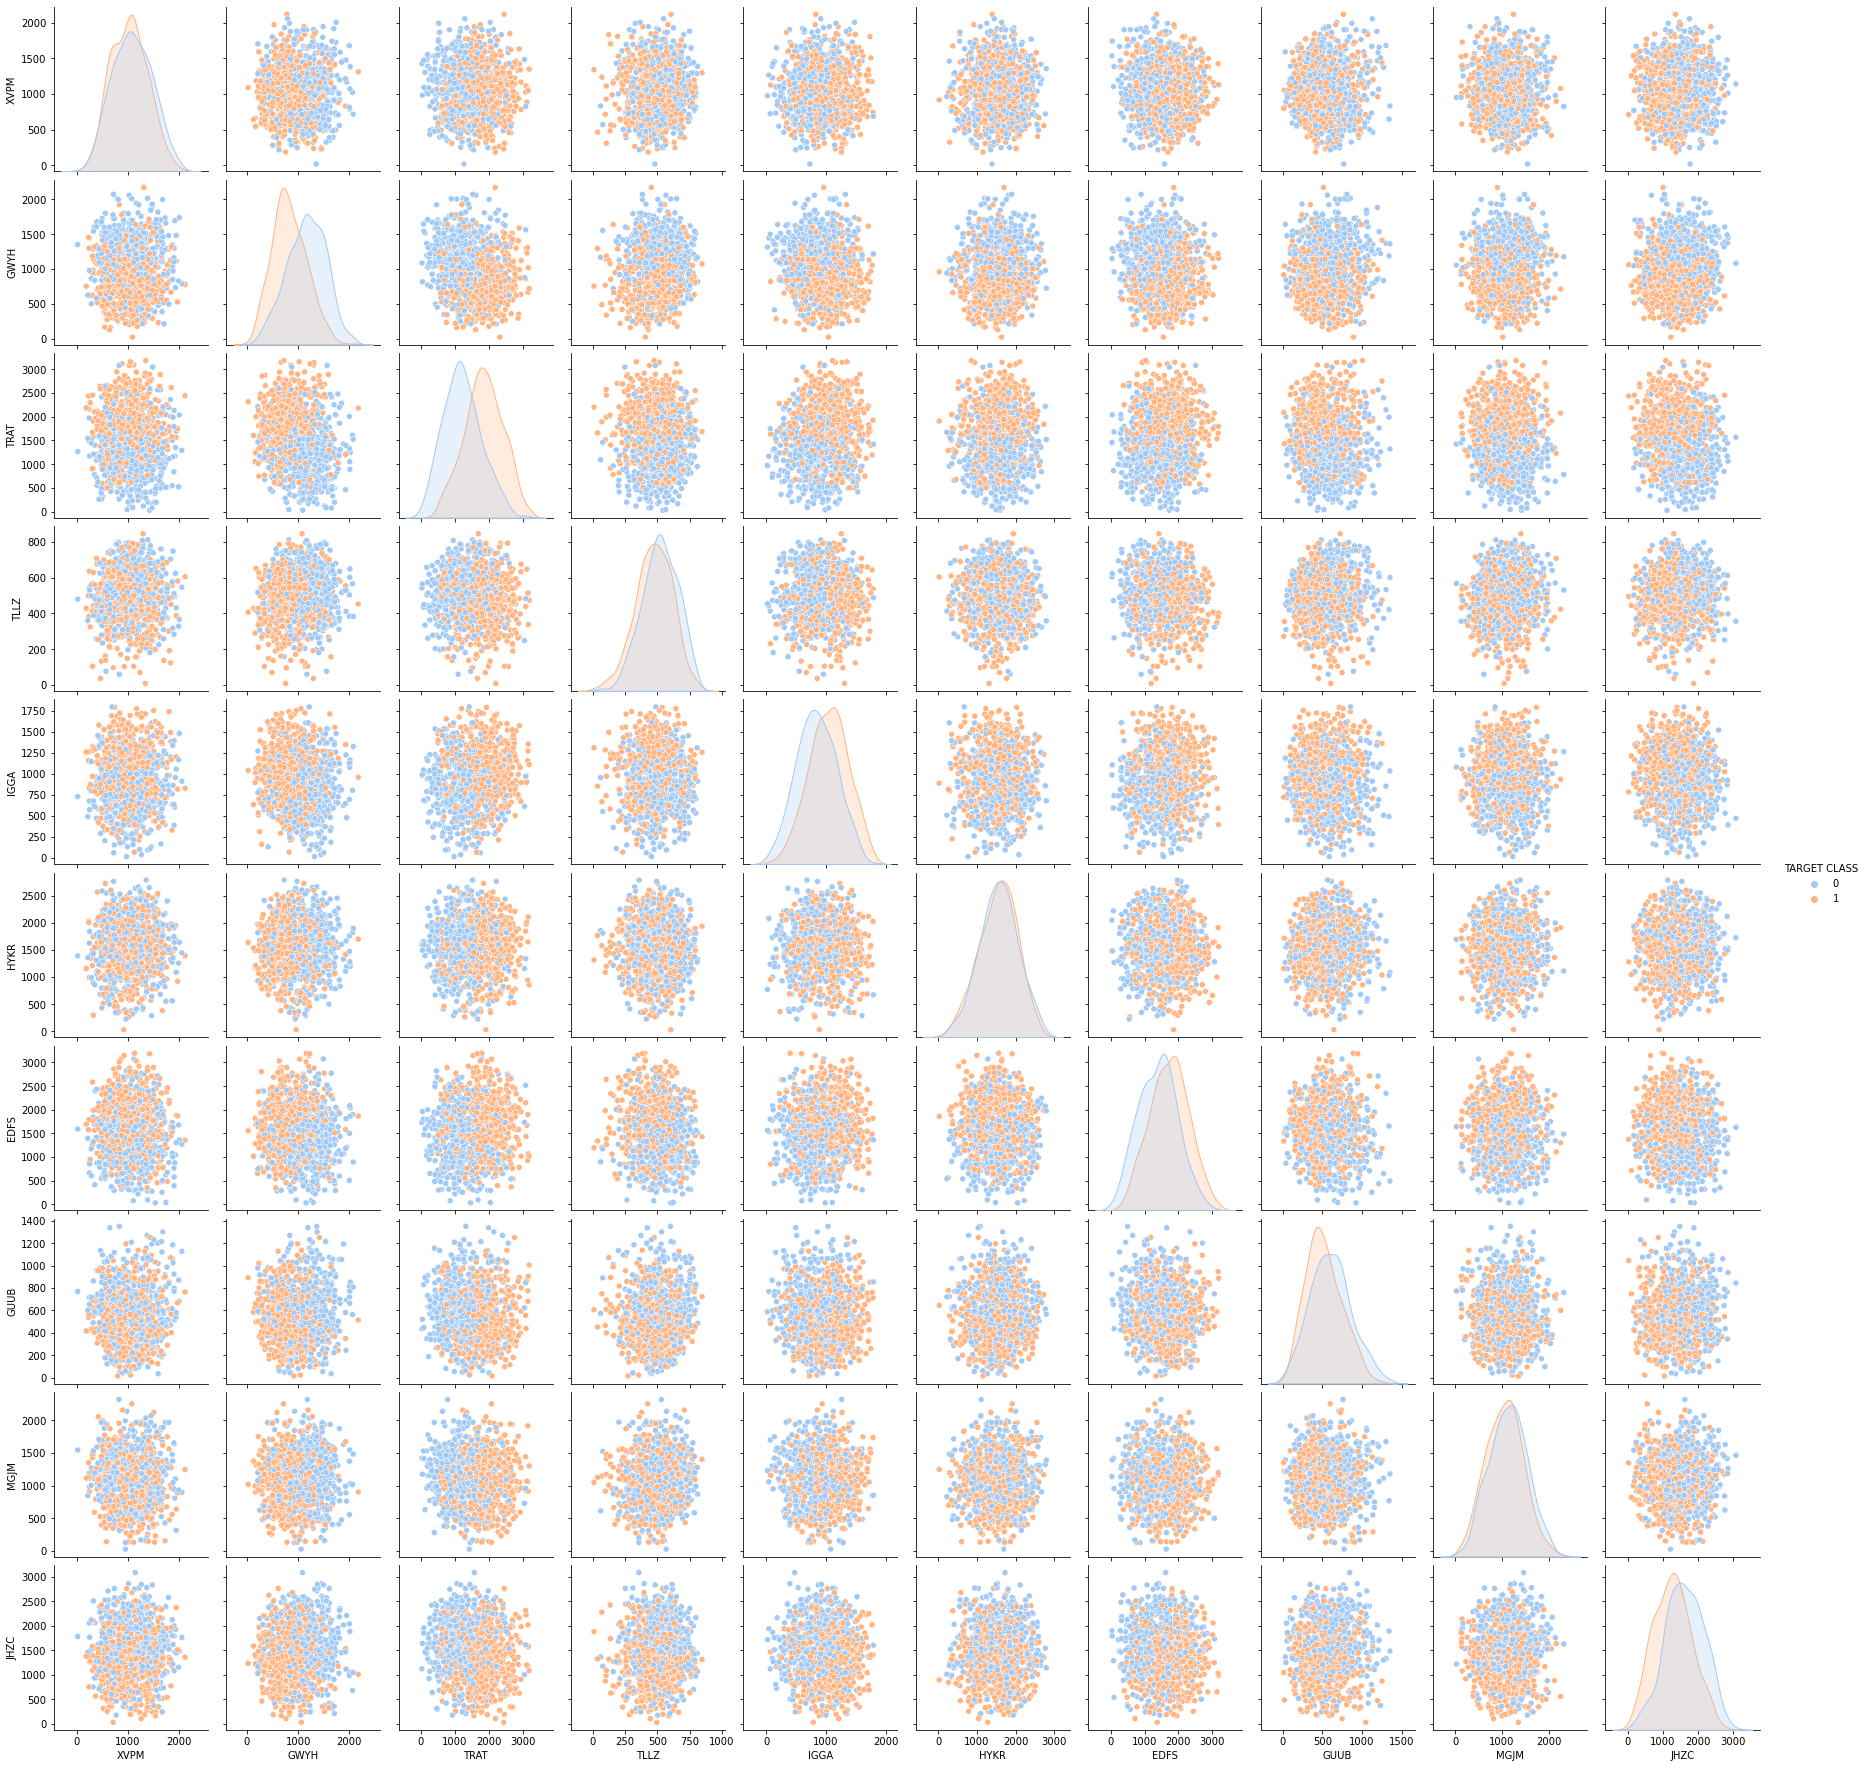

In [8]:
sns.pairplot(data, hue = 'TARGET CLASS', palette = 'pastel');

# Standardize the Variables

In [9]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [18]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

In [32]:
scaled_x = scaler.transform (data.drop('TARGET CLASS', axis = 1))

In [34]:
scaled_x = pd.DataFrame(scaled_x)
scaled_x

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,data['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
KNN = KNeighborsClassifier (n_neighbors = 3)

In [47]:
KNN.fit (x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predictions and Evaluations

**Use the predict method to predict values using your KNN model and X_test.**

In [48]:
predictions = KNN.predict(x_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(y_test,predictions))

[[121  37]
 [ 28 114]]


In [55]:
print(classification_report (y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       158
           1       0.75      0.80      0.78       142

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



# Choosing a K Value

In [59]:
error_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit (x_train, y_train)
    predictions_i = KNN.predict (x_test)
    error_rate.append(np.mean(predictions_i != y_test))

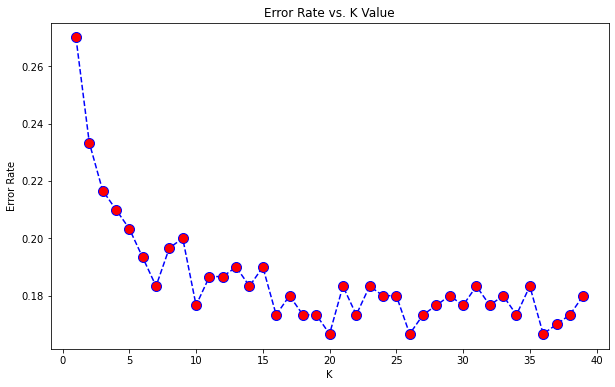

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

## Retrain with new K Value = 20

In [64]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(x_train,y_train)
predictions_2 = knn.predict(x_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,predictions_2))
print('\n')
print(classification_report(y_test,predictions_2))

WITH K=20


[[131  27]
 [ 23 119]]


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       158
           1       0.82      0.84      0.83       142

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

